# Proyecto Final - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 2. Limpieza y Normalización de Datos

In [32]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset

In [34]:
df = pd.read_csv('../data/Crop_recommendation.csv')
# Mostrar las primeras filas
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Tipos de datos

In [35]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# Descriptivas generales

In [36]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Media y mediana

In [37]:
# Mostrar media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

Mediana de las características numéricas:
N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64


# Varianza y desviación estándar

In [38]:
# Mostrar la varianza y desviación estándar de las características numéricas
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64

Desviación estándar de las características numéricas:
N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64


# Análisis exploratorio inicial

In [39]:
# Información básica del dataset
print("Información del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Estadísticas descriptivas:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.82567

# Detencion de outliers

In [40]:
# Tratar valores atípicos en las variables numéricas
df_cleaned = df.copy()
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# Eliminar valores atípicos usando el método IQR
for col in numerical_columns:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar outliers: {len(df_cleaned)}")

Filas originales: 2200
Filas después de eliminar outliers: 1846


# Visualizacion de distribuciones

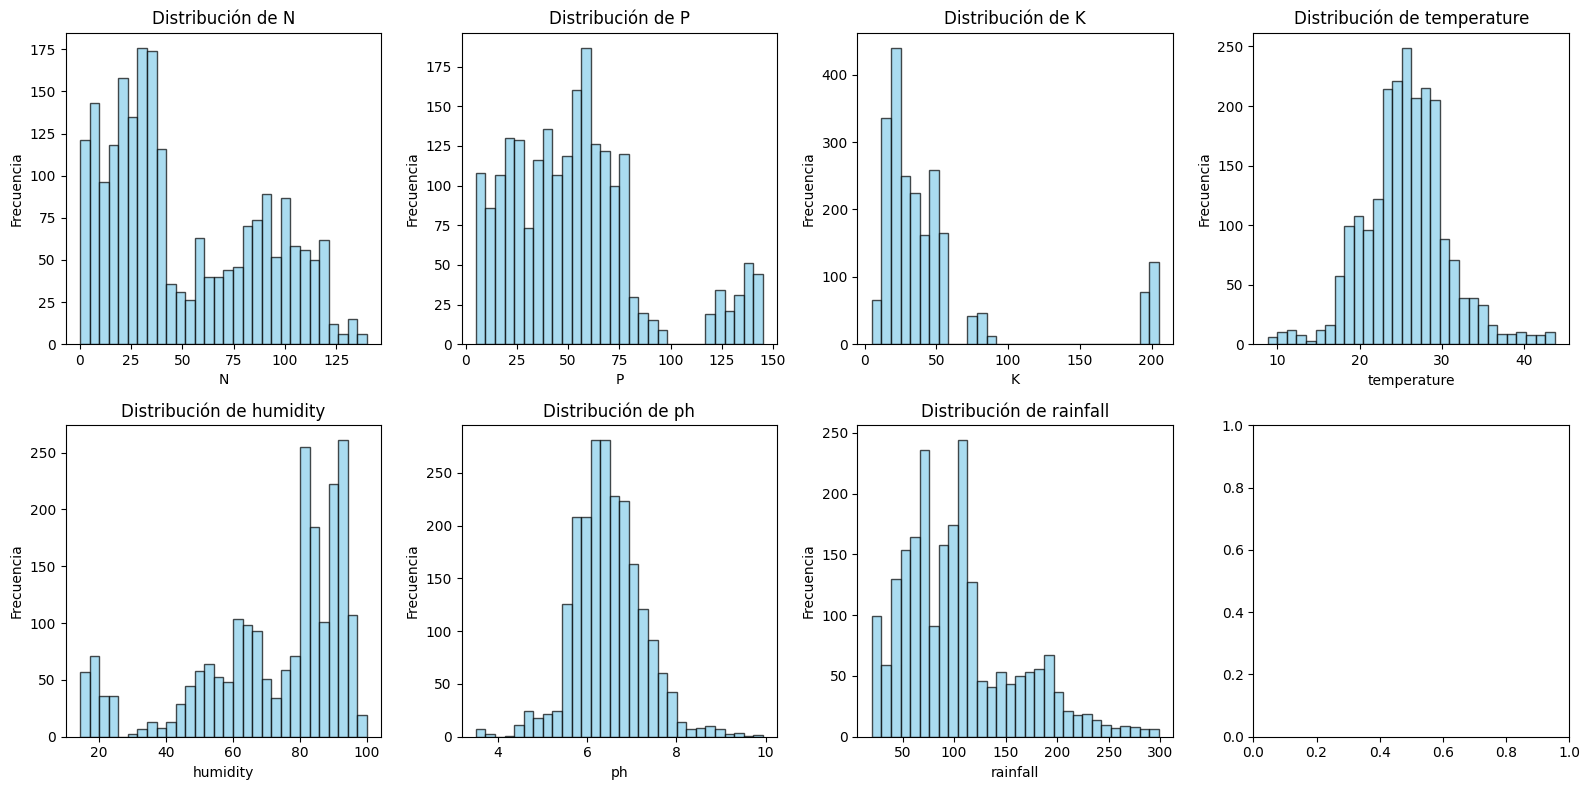

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Normalizacion (Standard Scaling)

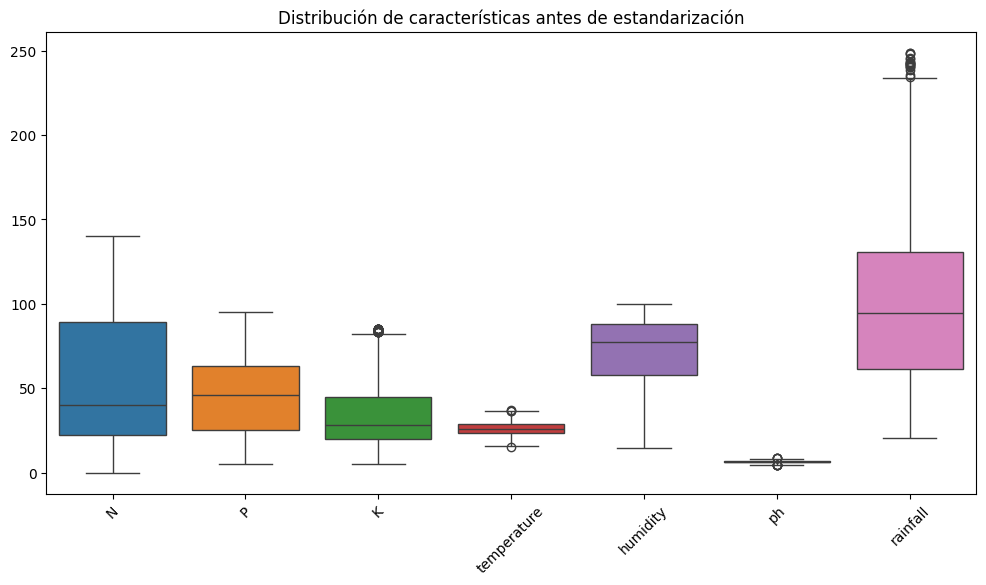

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title('Distribución de características antes de estandarización')
plt.xticks(rotation=45)
plt.show()


Dataset después de estandarización (primeras filas):
          N         P         K  temperature  humidity        ph  rainfall  \
0  0.943866 -0.140507  0.617341    -1.163084  0.540214  0.014157  1.935598   
1  0.812004  0.570599  0.496932    -0.948659  0.465882  0.800959  2.388110   
2  0.521906 -0.451616  0.436727     0.187749  0.458760  0.716127  2.697324   
3  1.049356  0.348379  0.436727    -1.308004  0.579578 -1.139126  2.680348   
4  0.917494  0.392823  0.316318    -0.287749  0.607893  0.282292  2.460426   

  label  
0  rice  
1  rice  
2   NaN  
3  rice  
4   NaN  


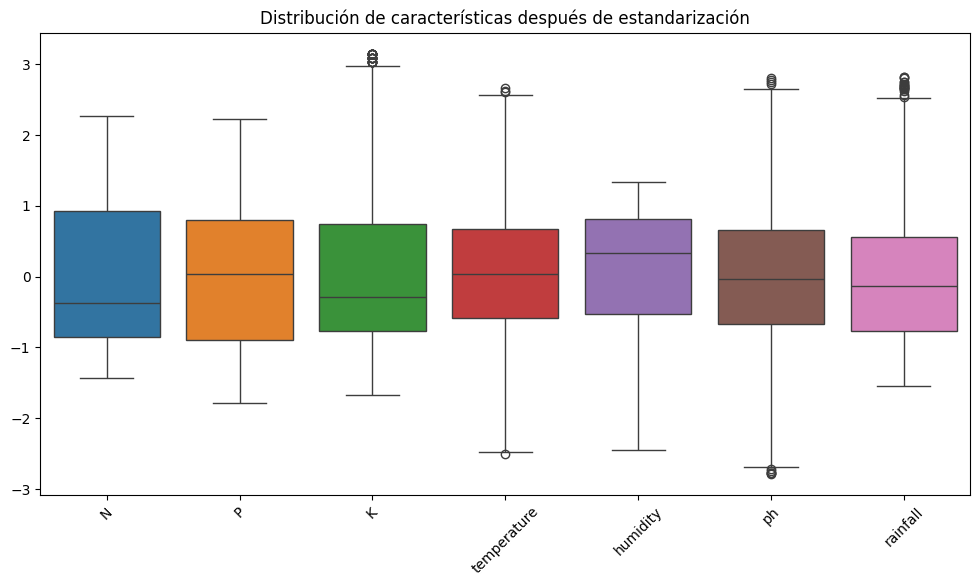

In [50]:
# Definir X (características) e y (etiqueta)
X = df_cleaned[numerical_columns]
y = df_cleaned['label']

# Aplicar estandarización (media=0, desviación=1)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Convertir a DataFrame para mejor visualización
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
df_standardized['label'] = y  # Añadir la columna de etiqueta

print("\nDataset después de estandarización (primeras filas):")
print(df_standardized.head())

# Visualización de datos estandarizados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized.drop('label', axis=1))
plt.title('Distribución de características después de estandarización')
plt.xticks(rotation=45)
plt.show()

# Guardar los datasets

In [ ]:
# Guardar datasets procesados
df_standardized.to_csv('crop_data_normalized.csv', index=False)

print("Procesamiento completado. Datasets guardados.")

Procesamiento completado. Datasets guardados.
